# CVI620 Assignment 03 - Part 01 

- **Name:** Aryan Khurana
- **Section:** NZAL
- **Date:** October 31, 2024
- **Professor:** Savita Sehrawat

## Task 00: Importing all packages

Here, we are just importing `pandas`, `matplotlib` and `scikit-learn`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Task 01: Data Exploration

### Load the dataset

Here, we load the flowers dataset provided to use in the [iris_csv](./iris_csv.csv) file.

We are also defining some features here that the CSV file has. Since all the features are relavant, we would be using all of them except for the target feature, namely, `class`.

In [2]:
dataset_filename: str = "iris_csv.csv"
flower_data = pd.read_csv(dataset_filename)
flower_data.head(5)
features = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']

### Explore the data using descriptive statistics and visualizations

This code generates a series of histograms to visualize the distribution of key features—sepal length, sepal width, petal length, and petal width—across different species of flowers in the flower_data dataset. 

- Each histogram allows us to observe how the values of a specific feature vary within each flower class, helping to identify patterns, overlaps, and distinctions between species. 
- By plotting the frequency of feature values, we can assess how well-separated the species are based on these measurements, which is crucial for understanding the K-Nearest Neighbors (KNN) classification model's performance later in this code. 
- Additionally, these visualizations can highlight potential outliers and inform feature selection, enhancing our overall approach to data analysis and modeling.

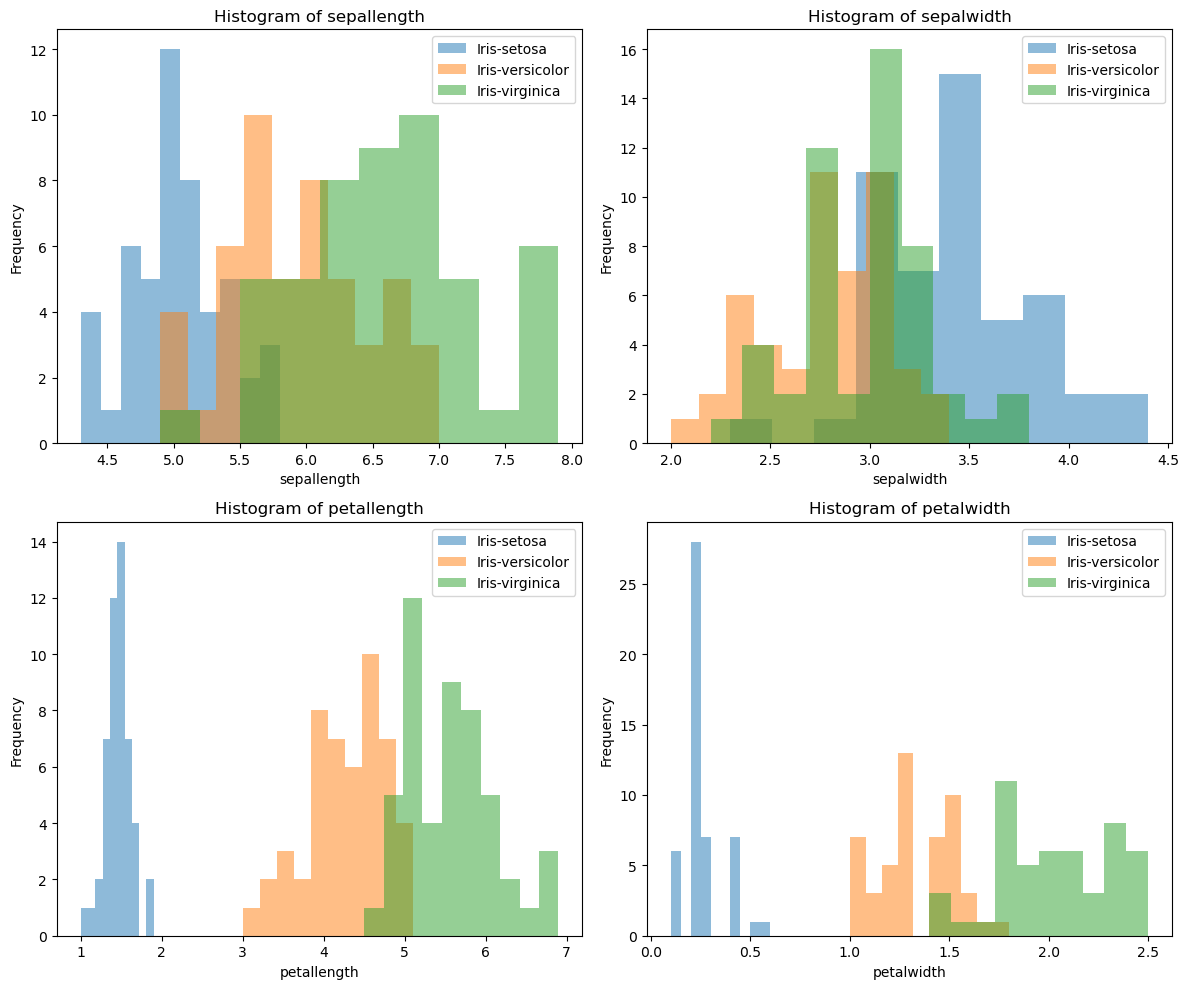

In [3]:
class_label = 'class'

plt.style.use('default')
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    for class_type in flower_data[class_label].unique():
        subset = flower_data[flower_data[class_label] == class_type]
        plt.hist(subset[feature], bins=10, alpha=0.5, label=class_type)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

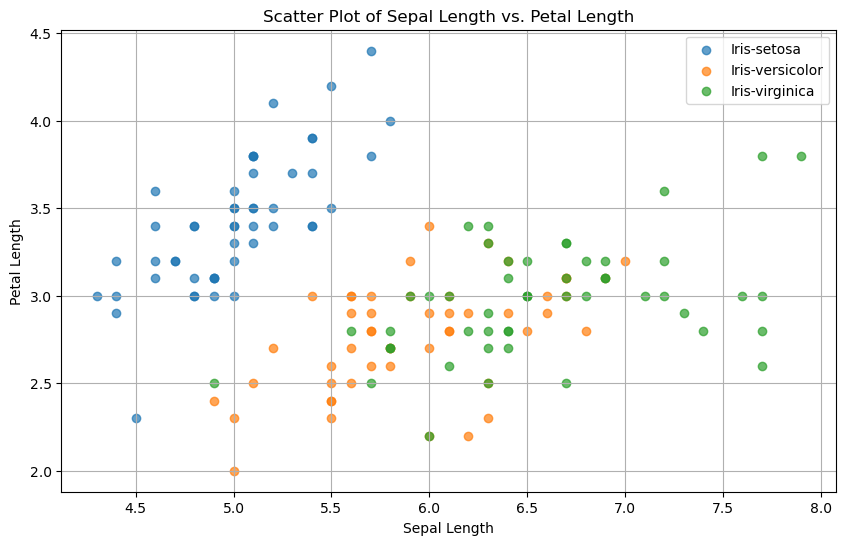

In [4]:
plt.figure(figsize=(10, 6))
for class_type in flower_data[class_label].unique():
    subset = flower_data[flower_data[class_label] == class_type]
    plt.scatter(subset[features[0]], subset[features[1]], label=class_type, alpha=0.7)

plt.title('Scatter Plot of Sepal Length vs. Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.grid(True)
plt.show()

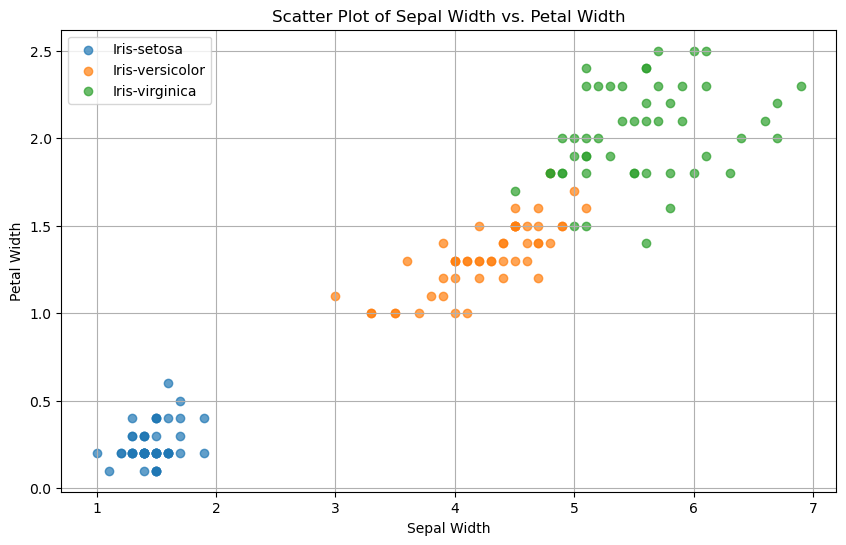

In [5]:
plt.figure(figsize=(10, 6))
for class_type in flower_data[class_label].unique():
    subset = flower_data[flower_data[class_label] == class_type]
    plt.scatter(subset[features[2]], subset[features[3]], label=class_type, alpha=0.7)

plt.title('Scatter Plot of Sepal Width vs. Petal Width')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()
plt.grid(True)
plt.show()

### Identify and missing values or outliers

In [6]:
flower_data.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

In [7]:
flower_data.dtypes

sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object

In [8]:
flower_data.shape

(150, 5)

In [9]:
flower_data.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [10]:
flower_data.isnull().sum().sum()

0

### Preprocess the data as necessary

In [11]:
flower_data.head(5)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
flower_data.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
sepallength,150.0,6.0,1.0,4.0,5.0,6.0,6.0,8.0
sepalwidth,150.0,3.0,0.0,2.0,3.0,3.0,3.0,4.0
petallength,150.0,4.0,2.0,1.0,2.0,4.0,5.0,7.0
petalwidth,150.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0


In [ ]:
# Normalizing the data
scaler = MinMaxScaler()
normalized_flower_data = pd.DataFrame(scaler.fit_transform(flower_data[features]), columns=features)
normalized_flower_data.head(5)

,sepallength,sepalwidth,petallength,petalwidth
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


## Task 02: Model Building

In [14]:
"""
In this context, `X` represents the feature variables (e.g., sepal length, sepal width) used for prediction, 
while `y` denotes the target variable (e.g., flower species) that we aim to classify.

The convention of using uppercase X and lowercase y in machine learning typically denotes that 
X represents a matrix or a dataset of input features (which can contain multiple columns), 
while y represents a vector of target labels or outputs (usually a single column). 
"""
X, y = normalized_flower_data, flower_data['class']

### Split the data into training and testing sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Implement the KNN algorithm using `scikit-learn`

In [27]:
# Ref Doc: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
model = KNeighborsClassifier(n_neighbors=3)

#### Some notes on KNN

**Reference** <https://www.youtube.com/watch?v=b6uHw7QW_n4>

In a K-Nearest Neighbors (KNN) classification context, the fundamental principle is that similar data points tend to cluster together in the feature space, allowing us to categorize them based on their proximity to one another. 

For instance, consider a dataset of various fruits, where each fruit is represented by its characteristics, such as weight, color intensity, and size. 

- If we visualize this data on a graph, we might observe distinct regions populated by different fruit types—one area could be filled with apples, while another is dominated by oranges. 
- When we introduce a new fruit into this visualization, we can classify it by examining its nearest neighbors in the graph. By looking at the fruits that are closest to this new point, we can infer its type; if it is surrounded by apples, it is likely to be classified as an apple. 

This approach applies similarly to the classification of flowers, where features such as sepal length and petal length define a graph. In this case, we can determine the species of a flower by analyzing the closest data points, thereby leveraging the proximity of similar flowers to make accurate classifications based on the KNN algorithm.


### Train the KNN model on the training set

In [28]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Task 03: Model Evaluation

In [29]:
y_pred = model.predict(X_test)

### Evaluate the performance of the model on the testing set using appropriate metrics 

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


### Interpret the results and discuss the model's strengths and weaknesses.

I was able to achieve a 100% accuracy with my K-Nearest Neighbors (KNN) model. This means the model perfectly classified every instance in the test dataset. P.S. if I switch the random state to something like an `8` instead of `42`, my accuracy drops to `90%`.

**Strengths:**  

- For starters, KNN is known for its simplicity, making it a great choice if you’re just getting into machine learning. It’s easy to implement and understand, which is a huge plus. 
- Another advantage is that KNN doesn’t assume anything about how your data is distributed. This flexibility can be a real benefit if your dataset doesn’t fit a standard pattern. 
- Plus, the model can adapt quickly to new data without needing a full retraining process, making it quite practical in changing environments.

**Weaknesses:**  

On the flip side, scoring a perfect accuracy might raise some red flags. 

- It could indicate that the model is overfitting, meaning it’s learned the training data too well, including any noise or peculiarities, rather than capturing the general trends. This could hurt its ability to perform well on new, unseen data. 
- Additionally, KNN can be a bit of a resource hog, especially as the dataset grows since it calculates distances to all training samples for every prediction. 
- Finally, KNN is sensitive to irrelevant features, so having unnecessary or redundant data can hurt its performance.